In [1]:
def plot(*args):
    for line in args:
        plt.figure(figsize=(15, 5))
        plt.plot(line)
        plt.show()

def plot_together(*args):
    plt.figure(figsize=(15, 5))
    for line in args:
        plt.plot(line)
    plt.show()

In [2]:
import sys
from random import random
sys.path.append('../')
from moed.model import Sequence, Model, WaveSequence
from moed.analysis import Analysis
from moed.proc import Proc, Filter
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

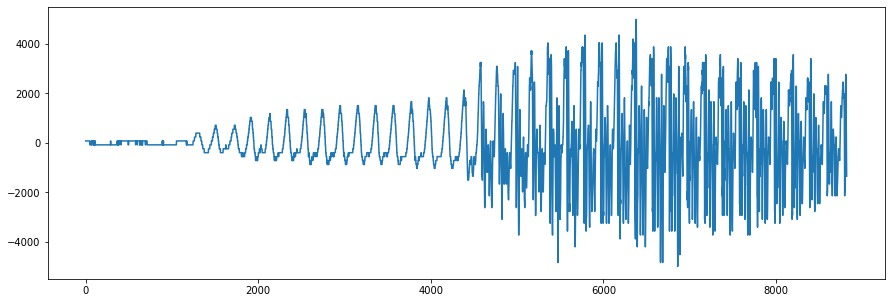

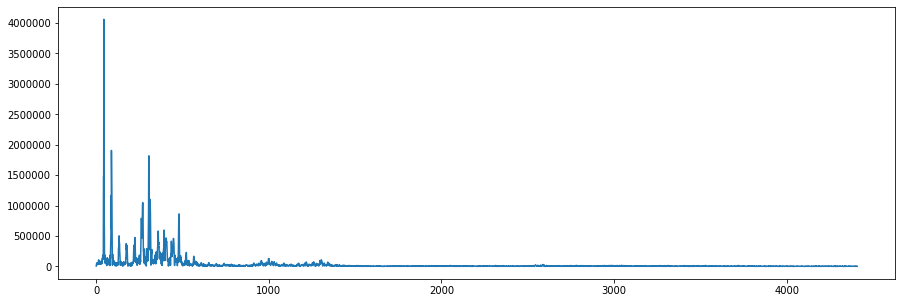

In [4]:
ma = WaveSequence.from_file('/home/pavel/Documents/moed/data/ma.wav')
ma.plot()
Analysis.fft(ma).plot()

In [119]:
wav = WaveSequence.from_file('/home/pavel/Documents/moed/data/voice.wav')

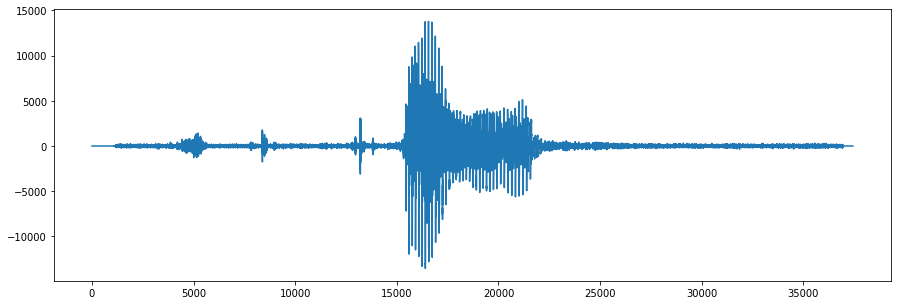

In [120]:
wav.plot()

In [93]:
dft = Analysis.fft(wav)
dft_begin = Sequence.from_dict(OrderedDict(zip(dft.x[:2500], dft.y[:2500])))

In [94]:
m = max(dft_begin.y)

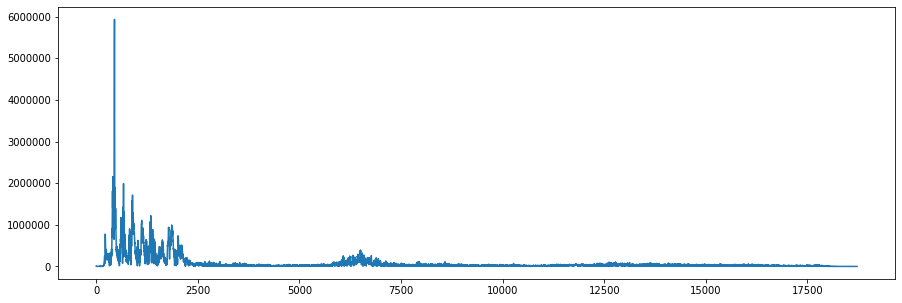

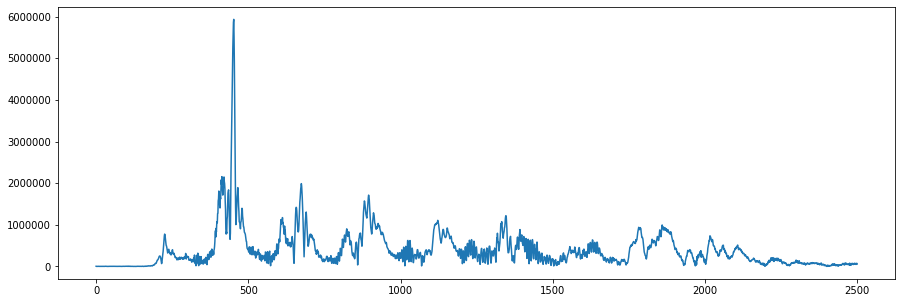

In [95]:
dft.plot()
dft_begin.plot()

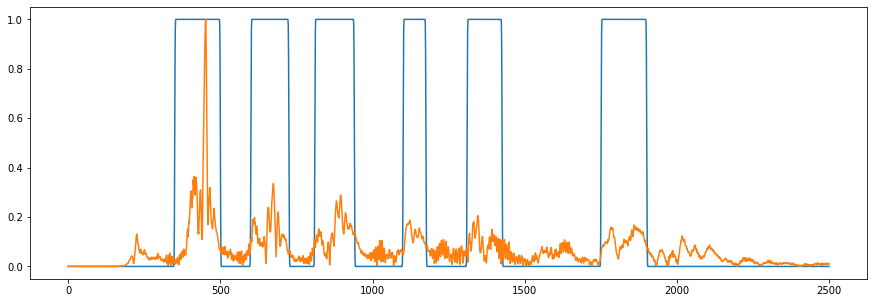

In [109]:
band1 = Analysis.fft(Filter.band_select_filter(len(dft_begin), 0.001, 70, 100))
band2 = Analysis.fft(Filter.band_select_filter(len(dft_begin), 0.001, 120, 145))
band3 = Analysis.fft(Filter.band_select_filter(len(dft_begin), 0.001, 162, 188))
band4 = Analysis.fft(Filter.band_select_filter(len(dft_begin), 0.001, 220, 235))
band5 = Analysis.fft(Filter.band_select_filter(len(dft_begin), 0.001, 262, 285))
band6 = Analysis.fft(Filter.band_select_filter(len(dft_begin), 0.001, 350, 380))

band_res = band1 * band2 * band3 * band4 * band5 * band6 - 1
plot_together(band_res.y, (dft_begin / m).y)

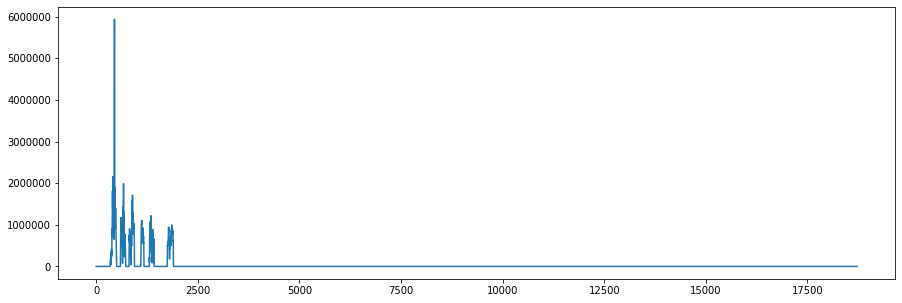

In [110]:
filtered = (dft_begin * band_res) + Sequence.from_func(dft.x, lambda x: 0)
filtered.plot()

In [111]:
from ipywidgets import FloatProgress
from IPython.display import display, clear_output

In [114]:
prgBar = FloatProgress(min=0, max=1)
display(prgBar)

FloatProgress(value=0.0, max=1.0)